## Implementación de Algoritmos para la predicción de generación de residuos

In [158]:
from utils import func_tools
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
importlib.reload(func_tools);

### Cargar los datos y inputar elementos faltantes

In [39]:
estra = pd.read_csv('estratificacion.csv',delimiter=',', index_col='ID')
data_csv_zona = pd.read_csv('residuosrecogidos_zona.csv', delimiter=',')
data_csv_localidad = pd.read_csv('residuosrecogidos_localidad.csv', delimiter=',')
data_csv_zona = func_tools.fillna_col_anterior(data_csv_zona)
data_csv_localidad = func_tools.fillna_2013(data_csv_localidad, estra, data_csv_zona )

### Contenido científico
1. Modelos de regresión convencionales  
   - Regresión por árboles de decisión
2. Modelos de regresión para predicciones  
   - Máquinas de soporte vectorial para regresión
3. Redes neuronales para predicciones
   - LSTM

## 1. Modelos de regresión convencionales 
- Regresión por árboles de decisión

In [136]:
dict_, series_list = series(estra,data_csv_zona,suavizado=3,tipo='zonas') # tipo = zonas o tipo = localidades     

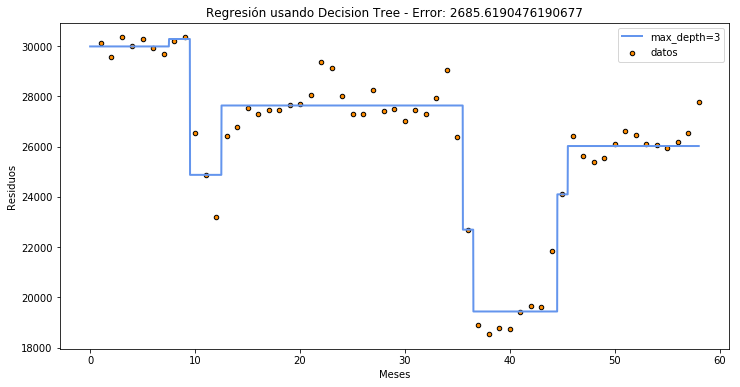

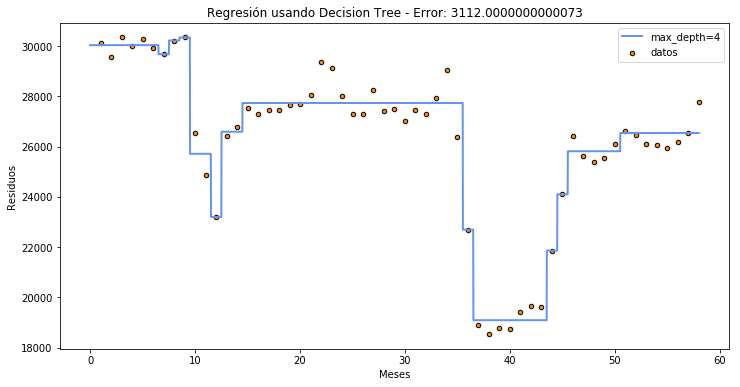

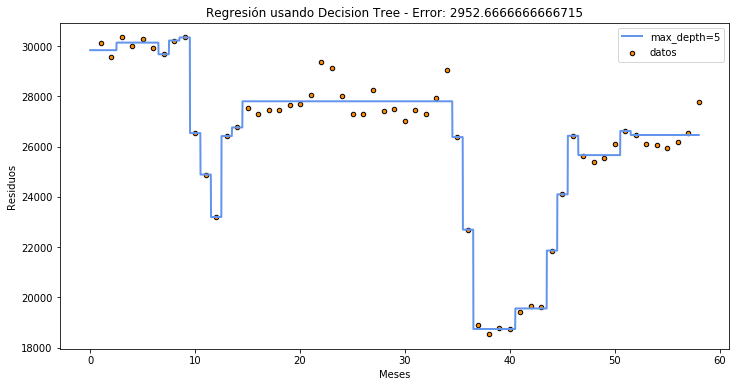

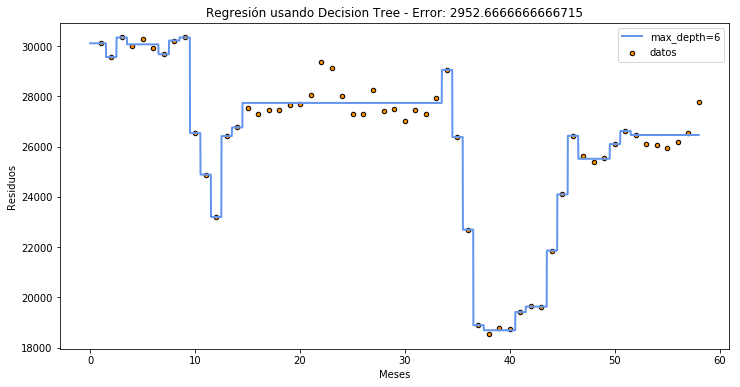

In [132]:
func_tools.decisiontrees(0, dict_['ASE 4'].dropna(), porcentaje_entrenamiento=0.90, deep = [3,4,5,6])

## 2. Modelos de regresión para predicciones  
   - Máquinas de soporte vectorial para regresión

Score entrenamiento R^2:  0.8881943482688966
Score entrenamiento R^2:  0.2095622017523613
Support vector (Coeficiente): 0.260


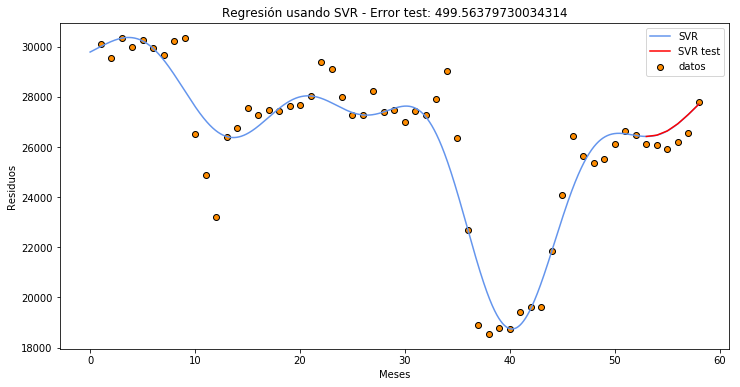

In [250]:
SVRegresion('name', dict_['ASE 4'].dropna(), cv=15, n_entrenamientos=200, porcentaje_entrenamiento=0.90)

## 3. Redes neuronales para predicciones
- LSTM

In [159]:
for i,si in enumerate(series_list):
    series_list[i][1] = si[1].dropna()

In [253]:
data_zonas = pd.DataFrame(series_list)
results = []
for num_zona in range(0,6):
    data_zonas_i = pd.DataFrame(data_zonas.iloc[num_zona,:].values[1].values)
    # Entrenar y evaluar el rendimiento
    result = func_tools.red_lstm_corto_plazo(data_zonas_i, epoch=300 ,porcentaje_entrenamiento=0.90)
    results.append(result)

Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6


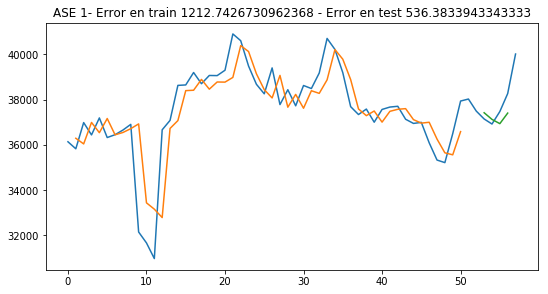

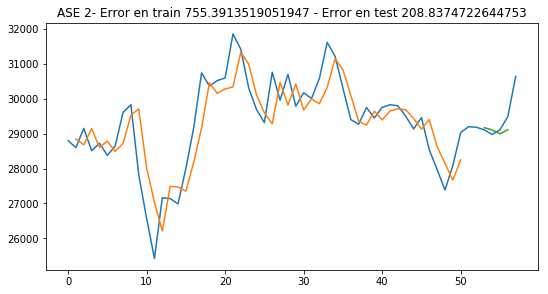

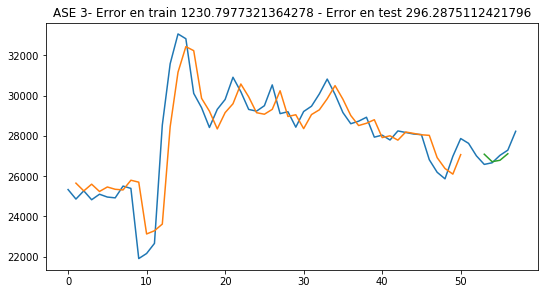

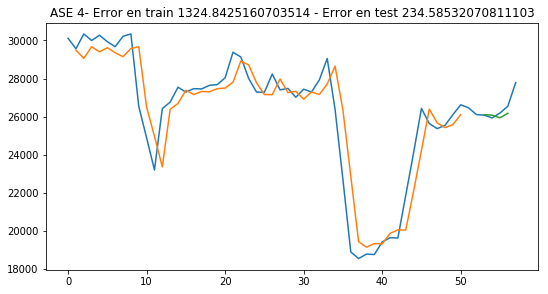

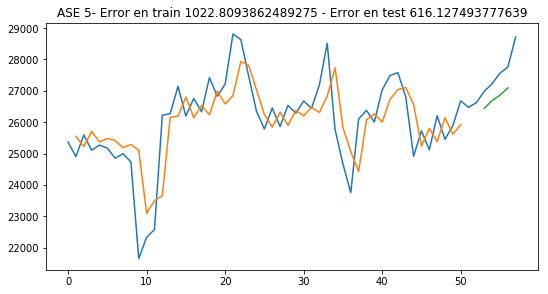

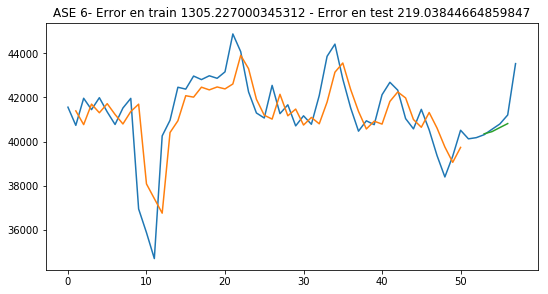

In [254]:
for i in range(0, 6):
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(2, 3, (i+1))
    plt.title('ASE ' + str(i+1)+ '- Error en train ' +str(results[i][3][0]) + ' - Error en test ' +str(results[i][3][1]))
    plt.plot(results[i][0]);plt.plot(results[i][1]);plt.plot(results[i][2]);plt.show();plt.close()

### LSTM con Ventana

In [162]:
data_zonas = pd.DataFrame(series_list)
results = []
for num_zona in range(0,6):
    data_zonas_i = pd.DataFrame(data_zonas.iloc[num_zona,:].values[1].values)
    # Entrenar y evaluar el rendimiento
    result = func_tools.lstm_ventana(data_zonas_i, epoch=200 ,porcentaje_entrenamiento=0.90, num_anteriores=3, num_capas=5)
    results.append(result)

Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6


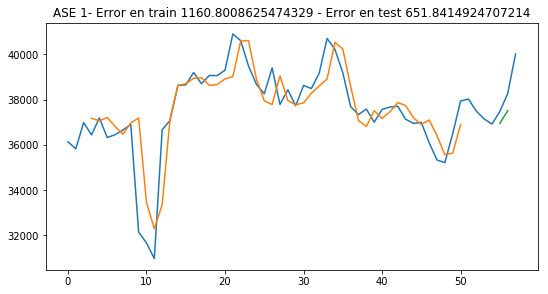

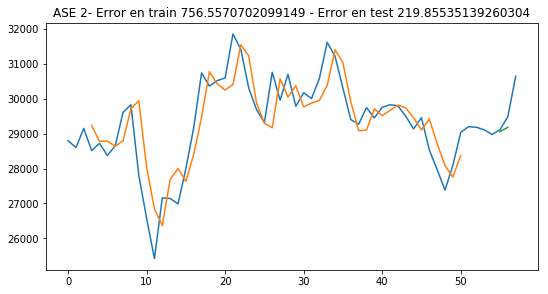

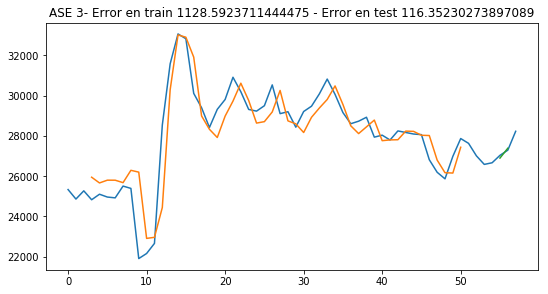

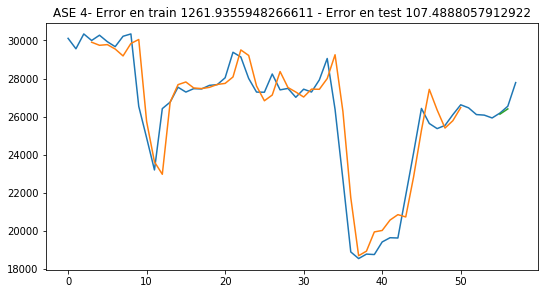

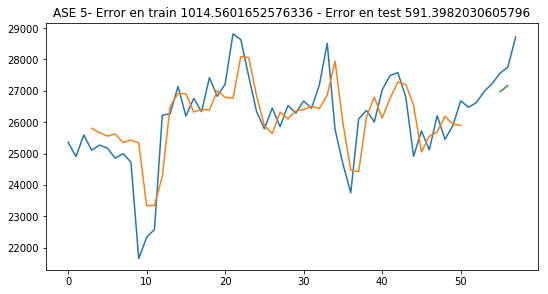

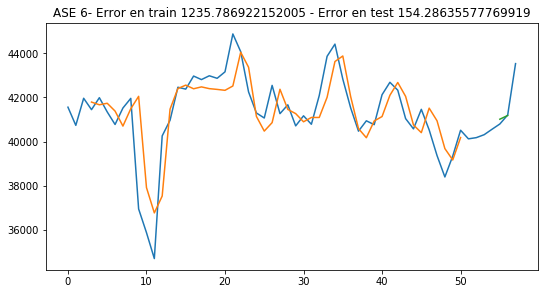

In [163]:
for i in range(0, 6):
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(2, 3, (i+1))
    plt.title('ASE ' + str(i+1)+ '- Error en train ' +str(results[i][3][0]) + ' - Error en test ' +str(results[i][3][1]))
    plt.plot(results[i][0]);plt.plot(results[i][1]);plt.plot(results[i][2]);plt.show();plt.close()

### LSTM para regresión con pasos de tiempo

In [251]:
data_zonas = pd.DataFrame(series_list)
results = []
for num_zona in range(0,6):
    data_zonas_i = pd.DataFrame(data_zonas.iloc[num_zona,:].values[1].values)
    # Entrenar y evaluar el rendimiento
    result = func_tools.lstm_ventana_regresion(data_zonas_i, epoch=200 ,porcentaje_entrenamiento=0.90, num_anteriores=2, num_capas=5)
    results.append(result)

Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6
Valores en train:  52 Valores en test:  6


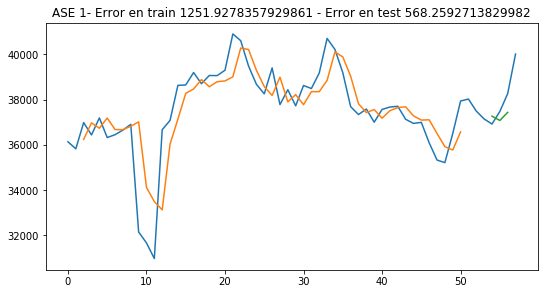

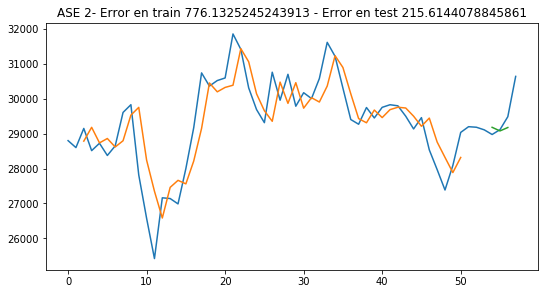

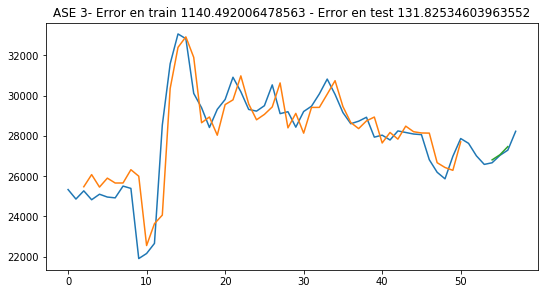

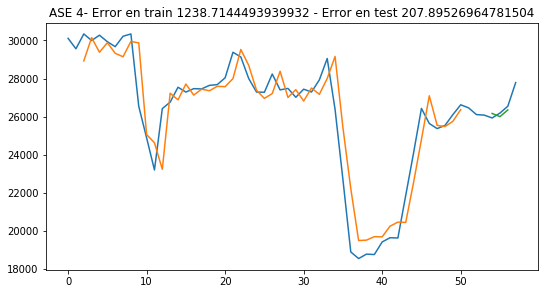

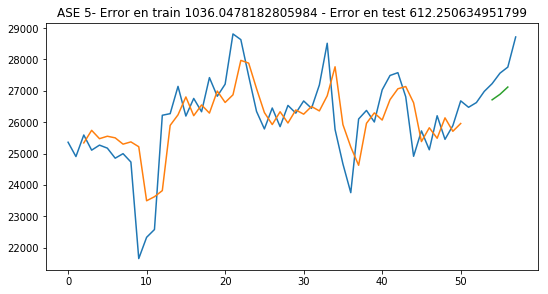

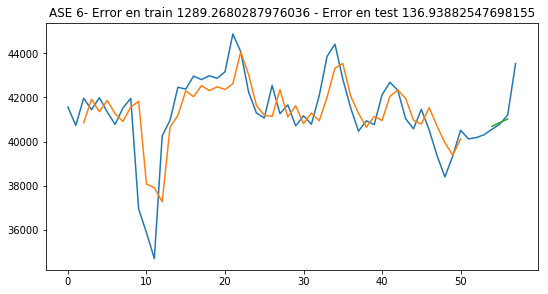

In [252]:
for i in range(0, 6):
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(2, 3, (i+1))
    plt.title('ASE ' + str(i+1)+ '- Error en train ' +str(results[i][3][0]) + ' - Error en test ' +str(results[i][3][1]))
    plt.plot(results[i][0]);plt.plot(results[i][1]);plt.plot(results[i][2]);plt.show();plt.close()

### LSTM con memoria entre lotes

In [ ]:
data_zonas = pd.DataFrame(series_list)
results = []
for num_zona in range(0,6):
    data_zonas_i = pd.DataFrame(data_zonas.iloc[num_zona,:].values[1].values)
    # Entrenar y evaluar el rendimiento
    result = func_tools.lstm_memoria_lotes(data_zonas_i, epoch=10 ,porcentaje_entrenamiento=0.90, num_anteriores=3, num_capas=4)
    results.append(result)

In [ ]:
for i in range(0, 6):
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(2, 3, (i+1))
    plt.title('ASE ' + str(i+1)+ '- Error en train ' +str(results[i][3][0]) + ' - Error en test ' +str(results[i][3][1]))
    plt.plot(results[i][0]);plt.plot(results[i][1]);plt.plot(results[i][2]);plt.show();plt.close()